In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Checking if i have GPU Enabled
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [7]:
 # 2 very important preprocessing is Resizing and Rescaling
batch_size = 32

In [8]:
training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.1)

test_datagen= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2)

#training_datagenarator

In [9]:
# dividing the data into training and validation
train=training_datagenarator.flow_from_directory('/content/gdrive/MyDrive/DisasterModel/train', target_size=(224, 224),color_mode='rgb', class_mode='categorical', batch_size=batch_size,subset='training')

validation=training_datagenarator.flow_from_directory('/content/gdrive/MyDrive/DisasterModel/train', target_size=(224, 224),color_mode='rgb', class_mode='categorical', batch_size=batch_size,subset='validation')

#test = test_datagen.flow_from_directory('/content/gdrive/MyDrive/DisasterModel/test', target_size=(224, 224),color_mode='rgb', class_mode='categorical', batch_size=batch_size,shuffle=False)

Found 1253 images belonging to 2 classes.
Found 139 images belonging to 2 classes.


In [10]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

In [11]:
# Initializing CNN
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(Dropout(0.25))
# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(Dropout(0.25))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=1))
cnn.add(Dropout(0.25))

# Flattening
cnn.add(tf.keras.layers.Flatten())
#cnn.add(tf.keras.layers.Dropout(0.3))
cnn.add(Dropout(0.5))
# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(BatchNormalization())
# Output layers
cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0

In [14]:
from keras.callbacks import EarlyStopping 

checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive/output/model.h5',
                                           monitor='val_loss',mode="min",save_best_only = True)
# simple early stopping
#es = EarlyStopping(monitor='val_loss', mode='max', verbose=1)

In [15]:
callbacks=checkpoint

In [15]:


cnn.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

cnn.fit(train,validation_data=validation,epochs=100,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
              callbacks=callbacks
                 )

Epoch 1/100
39/39 [==============================] - 46s 1s/step - loss: 0.6243 - accuracy: 0.7174 - val_loss: 2.3111 - val_accuracy: 0.4609
Epoch 2/100
39/39 [==============================] - 41s 1s/step - loss: 0.5640 - accuracy: 0.7265 - val_loss: 2.3400 - val_accuracy: 0.5469
Epoch 3/100
39/39 [==============================] - 44s 1s/step - loss: 0.5218 - accuracy: 0.7609 - val_loss: 0.5087 - val_accuracy: 0.7422
Epoch 4/100
39/39 [==============================] - 41s 1s/step - loss: 0.4618 - accuracy: 0.7920 - val_loss: 1.0890 - val_accuracy: 0.6875
Epoch 5/100
39/39 [==============================] - 41s 1s/step - loss: 0.4105 - accuracy: 0.8149 - val_loss: 1.8809 - val_accuracy: 0.4531
Epoch 6/100
39/39 [==============================] - 44s 1s/step - loss: 0.3961 - accuracy: 0.8477 - val_loss: 0.3849 - val_accuracy: 0.8750
Epoch 7/100
39/39 [==============================] - 41s 1s/step - loss: 0.3944 - accuracy: 0.8387 - val_loss: 0.7435 - val_accuracy: 0.6328
Epoch 8/100
3

In [17]:
from tensorflow.keras.models import load_model
cnn=load_model('/content/gdrive/MyDrive/output/model.h5')

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL


In [19]:
image_for_testing=r'/content/gdrive/MyDrive/training_dataset/Non_Damaged/06_03_0028.png'


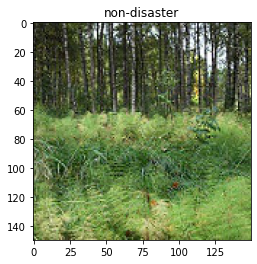

In [20]:
test_image=image.load_img(image_for_testing,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)

Catagories=['disaster','non-disaster']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(np.argmax(result))])
plt.show()

In [71]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(cnn)
 
# Load the pickled model
knn_from_pickle = pickle.loads(saved_model)
 


INFO:tensorflow:Assets written to: ram://f703aacd-779d-443f-9ebc-04e5132a4dde/assets
